In [1]:
import sys
import os
import shutil
import re
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import transforms as T

from data_manager import rgbd_gradients_dataset, rgbd_gradients_dataloader
from functions import torch2np_u8
import plot

np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [3]:
CWD             = os.getcwd()
DATASET_DIR     = os.path.join(CWD,'data/nyuv2')
print(DATASET_DIR)

/home/manor/cs236781-DeepLearning/project/data/nyuv2


In [4]:
IMAGE_SIZE = (64,64)
TRAIN_TEST_RATIO = 0.9
BATCH_SIZE=4
NUM_WORKERS=4

In [5]:
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize(IMAGE_SIZE),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

In [6]:
rgbd_grads_ds = rgbd_gradients_dataset(root=DATASET_DIR,transforms=tf)

Found 1288 images in dataset folder.


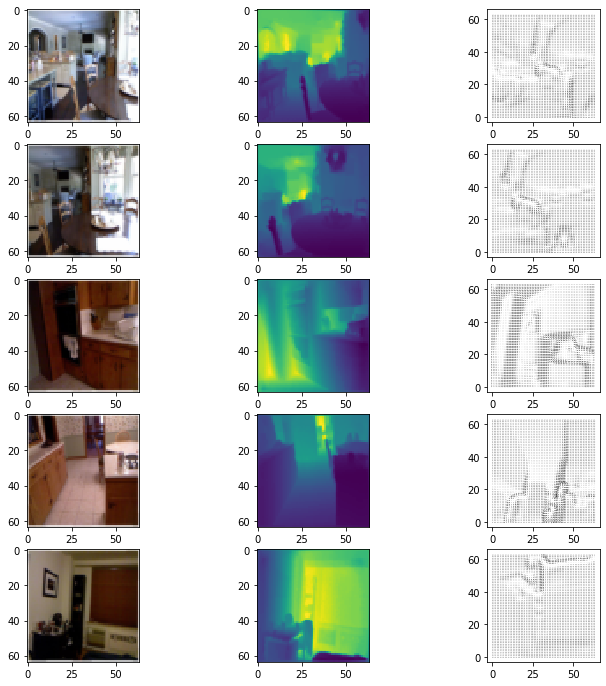

In [7]:
_ = plot.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=5)
print(f'Found {len(rgbd_grads_ds)} images in dataset folder.')

In [8]:
dl_train,dl_test = rgbd_gradients_dataloader(root=DATASET_DIR,
                                             batch_size=BATCH_SIZE,
                                             num_workers=NUM_WORKERS,
                                             train_test_ration=TRAIN_TEST_RATIO, transforms=tf)